In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pickle

In [3]:
data=pd.read_csv('amazon_alexa.csv')

In [4]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [6]:
print(data.isnull().sum())

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64


In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re

In [8]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ganku\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ganku\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
def clean_text(text):
  words = word_tokenize(text)
  stop_words = set(stopwords.words('english'))
  words = [word for word in words if word.lower() not in stop_words]
  words = [word for word in words if word not in string.punctuation]
  words = [word for word in words if not re.match(r'\b\d+(\.\d+)?\b', word)]
  cleaned_text = ' '.join(words)
  return cleaned_text

In [10]:
data = data.dropna(subset=['verified_reviews'])

In [11]:
review_text = data['verified_reviews']
cleaned_reviews = review_text.apply(clean_text)
print(cleaned_reviews)

0                                               Love Echo
1                                                   Loved
2       Sometimes playing game answer question correct...
3       lot fun thing yr old learns dinosaurs control ...
4                                                   Music
                              ...                        
3145                         Perfect kids adults everyone
3146    Listening music searching locations checking t...
3147    love things running entire home TV lights ther...
3148    complaint sound quality n't great mostly use c...
3149                                                 Good
Name: verified_reviews, Length: 3149, dtype: object


In [12]:
data['verified_reviews']=cleaned_reviews
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love Echo,1
1,5,31-Jul-18,Charcoal Fabric,Loved,1
2,4,31-Jul-18,Walnut Finish,Sometimes playing game answer question correct...,1
3,5,31-Jul-18,Charcoal Fabric,lot fun thing yr old learns dinosaurs control ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [14]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ganku\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
sentiments=SentimentIntensityAnalyzer()

In [16]:
def get_sentiment_label(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [17]:
data['sentiment_score'] = data['verified_reviews'].apply(lambda x: sentiments.polarity_scores(x)['compound'])
print(data)

      rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  \
0                                             Love Echo         1   
1                                                 Loved         1   
2     Sometimes playing game answer question correct...         1   
3     lot fun thing yr old learns dinosaurs control ...         1   
4                                                 Music         1   
...                                          

In [18]:
sentiment_scores = [sentiments.polarity_scores(review)['compound'] for review in cleaned_reviews]
sentiment_labels = [get_sentiment_label(score) for score in sentiment_scores]

In [19]:
data['sentiment'] = sentiment_labels

In [20]:
data.head()

,rating,date,variation,verified_reviews,feedback,sentiment_score,sentiment
0,5,31-Jul-18,Charcoal Fabric,Love Echo,1,0.6369,positive
1,5,31-Jul-18,Charcoal Fabric,Loved,1,0.5994,positive
2,4,31-Jul-18,Walnut Finish,Sometimes playing game answer question correct...,1,0.0516,positive
3,5,31-Jul-18,Charcoal Fabric,lot fun thing yr old learns dinosaurs control ...,1,0.9169,positive
4,5,31-Jul-18,Charcoal Fabric,Music,1,0.0000,neutral


In [21]:
ratings=data['rating'].value_counts()
number=ratings.index
quantity=ratings.values

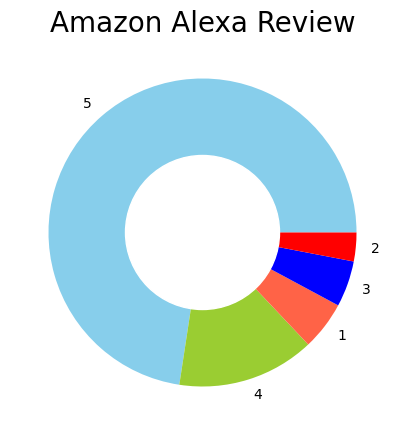

In [22]:
custom_colors=['skyblue','yellowgreen','tomato','blue','red']
plt.figure(figsize=(5,5))
plt.pie(quantity,labels=number,colors=custom_colors)
central_circle=plt.Circle((0,0),0.5,color='white')
fig=plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font',size=12)
plt.title('Amazon Alexa Review',fontsize=20)
plt.show()

In [23]:
X=data['verified_reviews']
y=data['sentiment']

In [24]:
X.value_counts()
y.value_counts()

sentiment
positive    2631
neutral      362
negative     156
Name: count, dtype: int64

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
vec = CountVectorizer()

In [27]:
X_vec = vec.fit_transform(X)

In [28]:
pickle.dump(vec, open('vec.pkl', 'wb'))

In [29]:
from sklearn.model_selection import train_test_split as tts

In [30]:
X_train, X_test, y_train, y_test = tts(X_vec, y, test_size=0.25, random_state=42)

In [31]:
from sklearn.svm import SVC

In [32]:
svc_model = SVC(kernel='linear')

In [33]:
svc_model.fit(X_train, y_train)

SVC(kernel='linear')

In [34]:
pickle.dump(svc_model, open('pra.pkl', 'wb'))

In [35]:
#pickle.dump(svc_model, open("vectorizer.pickle", "wb")) 
#pickle.load(open("vectorizer.pickle", 'rb'))     

In [36]:
y_pred = svc_model.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
accuracy1 = accuracy_score(y_test, y_pred)

In [61]:
print("Accuracy:",accuracy1)

Accuracy: 0.9200507614213198


In [62]:
#from sklearn.ensemble import RandomForestClassifier

In [63]:
#clf=RandomForestClassifier()

In [64]:
#clf.fit(X_train,y_train)

In [65]:
#predictions = clf.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
#accuracy = accuracy_score(y_test, predictions)

In [68]:
#print("Accuracy:",accuracy*100)

In [69]:
#new_reviews = ["The Echo is a cool unit, fun to use, but its usefulness depends on the user.",
              # "Echo Dot Poor directions for setting up, but if you can get it all figured out it works great with a few quirks",
               #"Pretty cool!",
                #"Very good, but there is room for improvement.",
                #"Very bad quality",
               #"Terrible!",
               #"bad"]


In [70]:
#new_reviews_vec = vec.transform(new_reviews)


In [71]:
#new_predictions = clf.predict(new_reviews_vec)

In [72]:
#print("Predictions for new reviews:")
for review, prediction in zip(new_reviews, new_predictions):
    print(f"{review}: {prediction}")

okish product: neutral


In [73]:
#pickle.dump(svc_model, open('pra.pkl', 'wb'))

In [74]:
#new_reviews = ["The Echo is a cool unit, fun to use, but its usefulness depends on the user."]

In [75]:
#new_reviews_vec = vec.transform(new_reviews)

In [76]:
#new_predictions = clf.predict(new_reviews_vec)

In [77]:
#print(new_predictions)

In [78]:
new_reviews=["okish product"]

In [79]:
new_reviews_vec = vec.transform(new_reviews)

In [80]:
new_predictions = svc_model.predict(new_reviews_vec)

In [81]:
print(new_predictions)

['neutral']
